# Some Graphs Using Data from UK Government Petitions Website

## Get json data from the page and convert to json object

In [2]:
import json
import requests
import matplotlib.pyplot as plt

# Get the data from the json webpage
url = "https://petition.parliament.uk/petitions/241584.json"
response = requests.get(url)

# Convert to json object
json_data = json.loads(response.content)

## Display Date Updated and The Current Count

In [3]:
signature_count = json_data['data']['attributes']['signature_count']
updated_at = json_data['data']['attributes']['updated_at']
display("Count: {}".format(signature_count))
display("Updated: {}".format(updated_at))

'Count: 5735546'

'Updated: 2019-03-26T14:56:45.153Z'

## Extract just the constituency-based data
Which has this sort of format
```
[{u'mp': u'Tommy Sheppard MP',
  u'name': u'Edinburgh East',
  u'ons_code': u'S14000022',
  u'signature_count': 12078},
 {u'mp': u'Deidre Brock MP',
  u'name': u'Edinburgh North and Leith',
  u'ons_code': u'S14000023',
  u'signature_count': 17969},
 {u'mp': u'Ian Murray MP',
 ```

In [4]:
constituency_data = json_data['data']['attributes']['signatures_by_constituency']

## Find the 16 constituencies with the highest counts and plot as graph

In [5]:
# Sort constituencies by signature count
constituency_data_ordered = sorted(constituency_data, key = lambda x: int(x["signature_count"]))

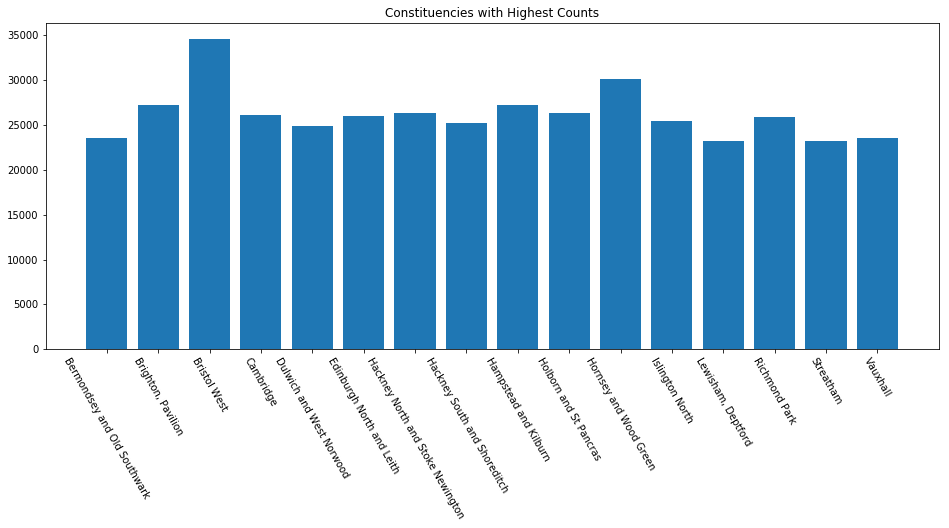

In [9]:
# Plot Graph
yvalues = [c["signature_count"] for c in constituency_data_ordered[-16:]]
xvalues = [c["name"] for c in constituency_data_ordered[-16:]]
plt.figure(figsize=(16,6))
plt.title("Constituencies with Highest Counts")
plt.xticks(rotation=300)
_ = plt.bar(xvalues, yvalues)

## Find The 16 constituencies with lowest counts and plot as a graph

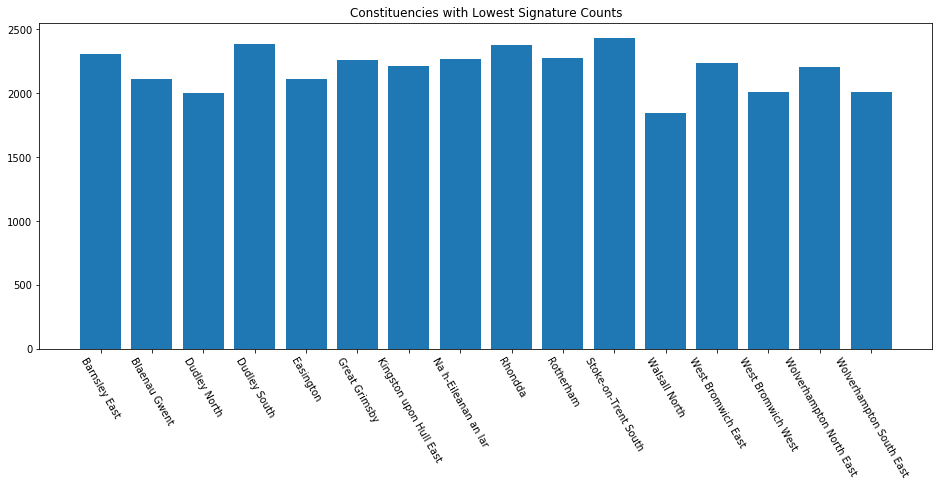

In [6]:
yvalues = [c["signature_count"] for c in constituency_data_ordered[:16]]
xvalues = [c["name"] for c in constituency_data_ordered[:16]]
plt.figure(figsize=(16,6))
plt.title("Constituencies with Lowest Signature Counts")
plt.xticks(rotation=300)
_ = plt.bar(xvalues, yvalues)

## Extract just the country-based data

In [7]:
country_data = json_data['data']['attributes']['signatures_by_country']
country_data_ordered = sorted(country_data, key = lambda x: int(x["signature_count"]))

## Pie chart of signatures by country

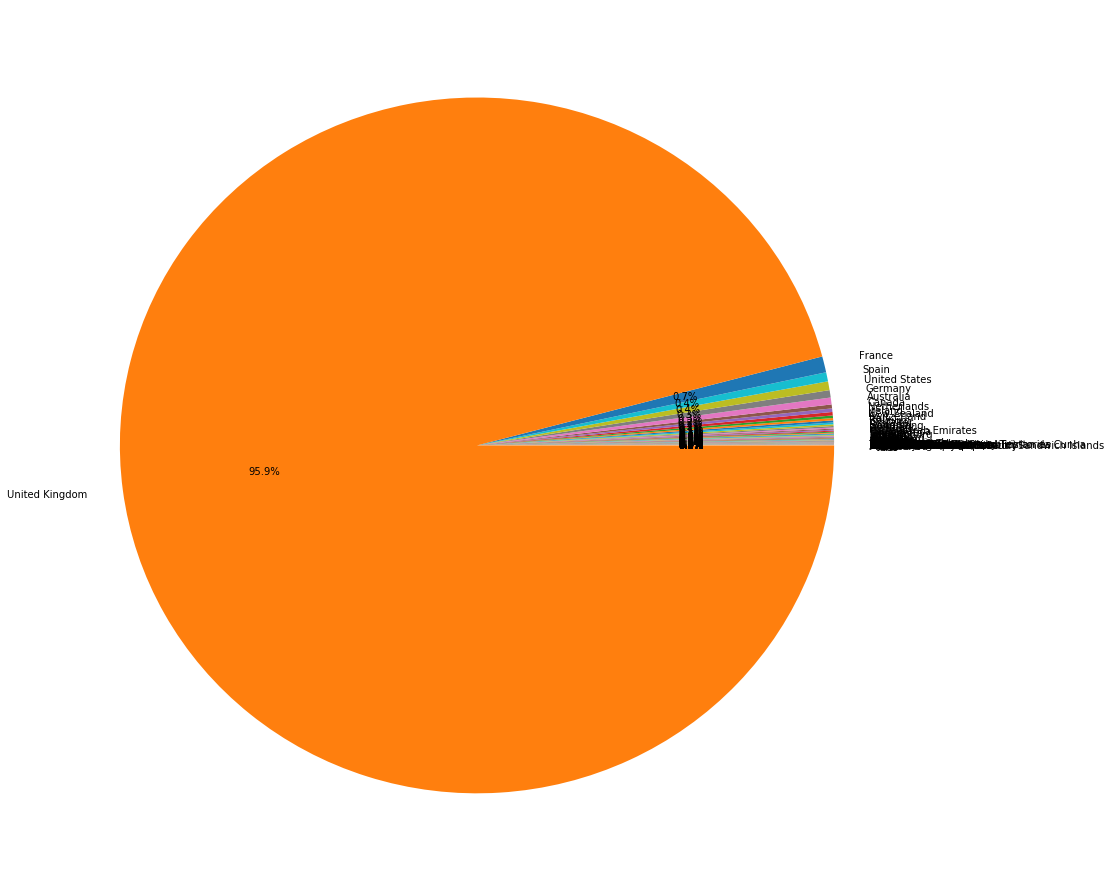

In [8]:
names = [cd["name"] for cd in country_data_ordered] 
counts = [cd["signature_count"] for cd in country_data_ordered]

plt.figure(figsize=(16, 16))
plt.pie(counts, labels=names, autopct='%1.1f%%')
plt.show()

### Pie chart of signatures by country excluding UK

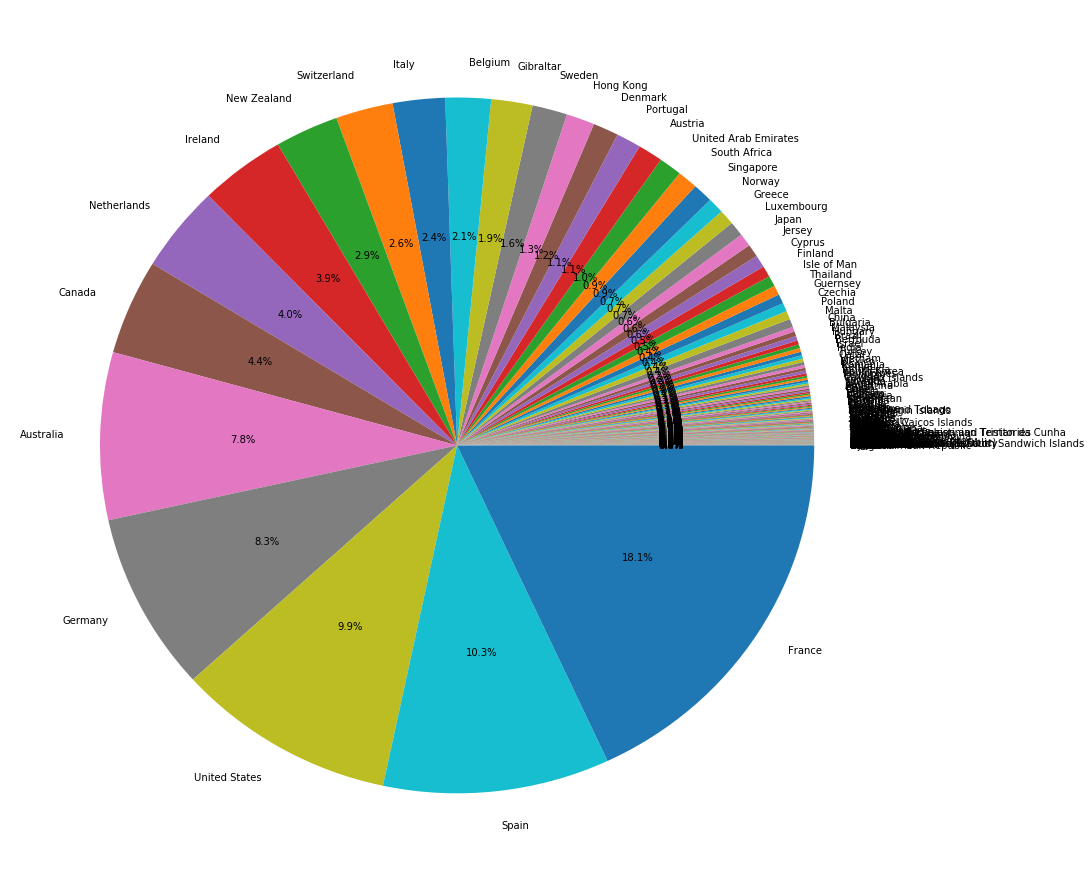

In [9]:
names = [cd["name"] for cd in country_data_ordered if cd["name"] != "United Kingdom"] 
counts = [cd["signature_count"] for cd in country_data_ordered if cd["name"] != "United Kingdom"]

plt.figure(figsize=(16, 16))
plt.pie(counts, labels=names, autopct='%1.1f%%')
plt.show()